In [2]:
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = 200
pd.options.display.max_columns = 50
from itertools import product

import matplotlib.pyplot as plt

import plotly.express as px

import app_rais.dicts_constants as dc

import app_rais.analytics_potec as potec

import bamboolib as bam
#bam.enable()
bam.disable()

The bamboolib extension was disabled. You can enable it again via 'bam.enable()'. In case that bamboolib was not helpful to you, we are sorry and would like to fix this. Please write us a quick mail to info@8080labs.com so that we can serve you better in the future. Best regards, Tobias and Florian


O dicionário que é utilizado para fazer o mapeamento dos tipos de POTEC em relação à coluna CBO Ocupação 2002 está correto.
O objeto dtype dc.type_cat_potec tem todas as categorias
Em Minas Gerais, o problema é o grande número de professores de ensino superior, mais do que 100 mil profissionais em 2007 e e 2008, o que não se mantém nos anos seguintes.

In [11]:
dict_df = dict()
for year in list(range(2007,2017)):
    df = pd.read_pickle(f'app_rais/data/rais_treated/{year}/CE{year}.zip')
    df['CBO'] = df['CBO Ocupação 2002'].str.slice(start=0, stop=3).astype(np.int32)
    df['Professores'] = df['CBO'].map({231:'Ensino Fundamental', 232: 'Ensino Médio',233:'Ensino Profissional', 234:'Ensino Superior'}).fillna('Não Professor')
    df = pd.DataFrame(df.groupby(['arranjo', 'Professores', 'Natureza Jurídica'], observed=True).size()).reset_index().rename(columns={0:'Pessoal'})
    dict_df[str(year)] = df
    
df_concat = pd.concat(dict_df.values(), keys=dict_df.keys())

In [12]:
df_concat = df_concat.reset_index().rename(columns={'level_0':'Ano'}).drop(columns='level_1')

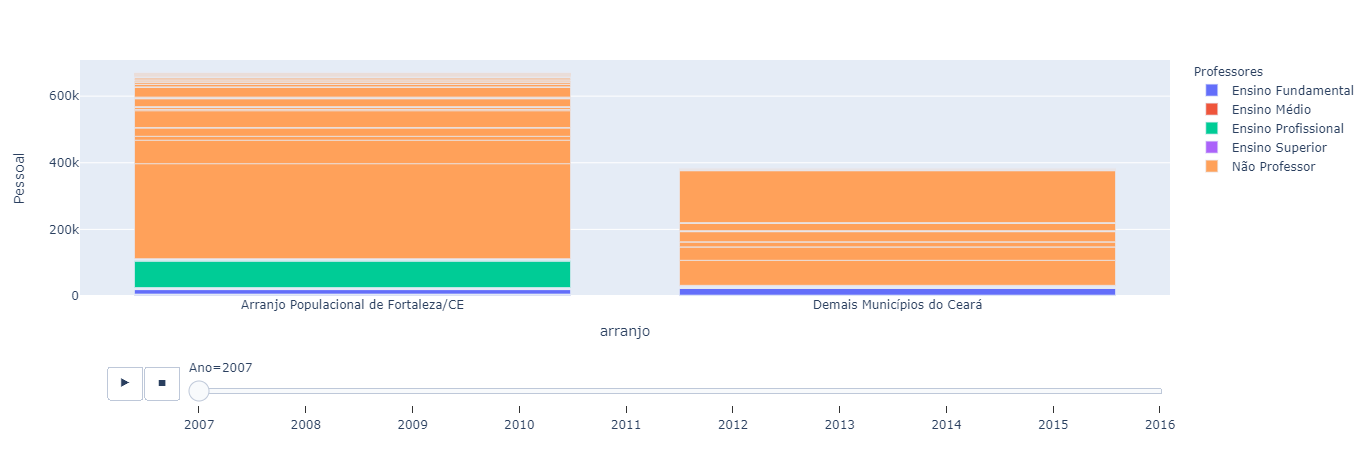

In [14]:
px.bar(
    data_frame=df_concat
    , x='arranjo'
    , y='Pessoal'
    , color='Professores'
    , animation_frame='Ano'
    , category_orders={'arranjo':['Arranjo Populacional de Fortaleza/CE', 'Demais Municípios do Ceará']}
)

In [27]:
dict_df = dict()
for year in list(range(2007,2017)):
    df = pd.read_pickle(f'app_rais/data/rais_treated/{year}/CE{year}.zip')
    df['CBO'] = df['CBO Ocupação 2002'].str.slice(start=0, stop=2)
    df = pd.DataFrame(df.groupby(['arranjo','CBO', 'Natureza Jurídica'], observed=True).size()).reset_index().rename(columns={0:'Pessoal'})
    dict_df[str(year)] = df
    
df_concat = pd.concat(dict_df.values(), keys=dict_df.keys())

In [28]:
df_concat = df_concat.reset_index().rename(columns={'level_0':'Ano'}).drop(columns='level_1')

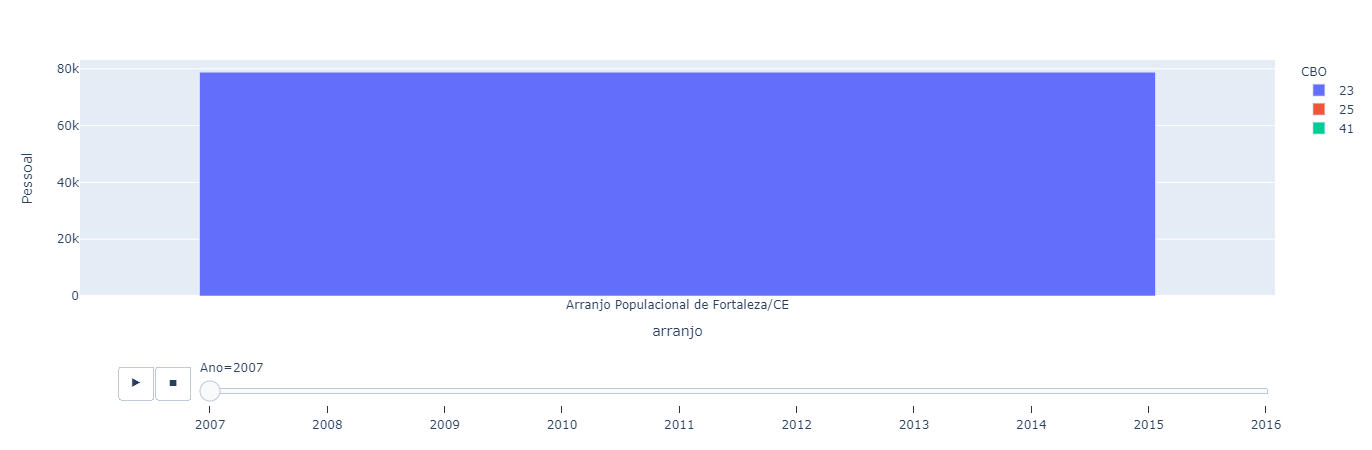

In [30]:
px.bar(
    data_frame=df_concat[df_concat['Natureza Jurídica'] == '1023']
    , x='arranjo'
    , y='Pessoal'
    , color='CBO'
    , animation_frame='Ano'
    , category_orders={'arranjo':['Arranjo Populacional de Fortaleza/CE', 'Demais Municípios do Ceará']}
)


In [9]:
df_concat[df_concat['Natureza Jurídica'] == '1023']

,Ano,arranjo,Professores,Natureza Jurídica,Pessoal
47,2007,Arranjo Populacional de Fortaleza/CE,Ensino Profissional,1023,78916
92,2007,Arranjo Populacional de Fortaleza/CE,Não Professor,1023,12
238,2008,Arranjo Populacional de Fortaleza/CE,Ensino Profissional,1023,90866
284,2008,Arranjo Populacional de Fortaleza/CE,Não Professor,1023,14
378,2008,Demais Municípios do Ceará,Não Professor,1023,2
464,2009,Arranjo Populacional de Fortaleza/CE,Não Professor,1023,92496
554,2009,Demais Municípios do Ceará,Não Professor,1023,40
644,2010,Arranjo Populacional de Fortaleza/CE,Não Professor,1023,96546
729,2010,Demais Municípios do Ceará,Não Professor,1023,250
816,2011,Arranjo Populacional de Fortaleza/CE,Não Professor,1023,95270


In [2]:
pd_pickle_ce2008 = pd.read_pickle('app_rais/data/rais_treated/2008/CE2008.zip')

In [14]:
pd_pickle_ce2008['CBO'] = pd_pickle_ce2008['CBO Ocupação 2002'].str.slice(start=0, stop=3).astype(np.int32)

In [18]:
pd_pickle_ce2008['Professores'] = 'Não'

In [22]:
pd_pickle_ce2008['Professores'] = pd_pickle_ce2008['CBO'].map({231:'Ensino Fundamental', 232: 'Ensino Médio',233:'Ensino Profissional', 234:'Ensino Superior'}).fillna('Não Professor')

In [31]:
pd.DataFrame(pd_pickle_ce2008.groupby(['arranjo', 'Professores'], observed=True).size()).reset_index().rename(columns={0:'Pessoal'})

,arranjo,Professores,Pessoal
0,Arranjo Populacional de Fortaleza/CE,Ensino Fundamental,22517
1,Arranjo Populacional de Fortaleza/CE,Ensino Médio,2255
2,Arranjo Populacional de Fortaleza/CE,Ensino Profissional,99214
3,Arranjo Populacional de Fortaleza/CE,Ensino Superior,3833
4,Arranjo Populacional de Fortaleza/CE,Não Professor,609210
5,Demais Municípios do Ceará,Ensino Fundamental,24769
6,Demais Municípios do Ceará,Ensino Médio,4661
7,Demais Municípios do Ceará,Ensino Profissional,2829
8,Demais Municípios do Ceará,Ensino Superior,1857
9,Demais Municípios do Ceará,Não Professor,358854


In [23]:
px.bar(
    data_frame=pd_pickle_ce2008
    , x='arranjo'
    , 
)

0            Não Professor
1            Não Professor
2            Não Professor
3            Não Professor
4            Não Professor
                ...       
1129994      Não Professor
1129995      Não Professor
1129996      Não Professor
1129997    Ensino Superior
1129998    Ensino Superior
Name: Professores, Length: 1129999, dtype: object

In [47]:
pd_pickle_ce2008[pd_pickle_ce2008['CBO Ocupação 2002'].str.startswith('233')]

,CBO Ocupação 2002,CNAE 2.0 Classe,CNAE 95 Classe,Faixa Etária,Faixa Remun Dezem (SM),Faixa Remun Média (SM),Escolaridade após 2005,Idade,Ind Simples,Município,Nacionalidade,Natureza Jurídica,Raça Cor,Vl Remun Dezembro Nom,Vl Remun Dezembro (SM),Vl Remun Média Nom,Vl Remun Média (SM),Sexo Trabalhador,Tamanho Estabelecimento,Tipo Estab,Tipo Estab.1,territorio_tese,arranjo,knowledge_services,technology_industries,potec
8424,233110,84116,75116,08,03,02,2,68,0,230440,10,1023,{ñ,533.51,1.28,521.42,1.27,01,5,01,CNPJ,NaN,Arranjo Populacional de Fortaleza/CE,Other knowledge-intensive services,Without Classification,Professores de ensino Profissional
9820,233110,84248,75248,08,04,03,2,80,0,230440,10,1023,{ñ,662.10,1.59,632.41,1.54,01,10,01,CNPJ,NaN,Arranjo Populacional de Fortaleza/CE,Other knowledge-intensive services,Without Classification,Professores de ensino Profissional
9821,233110,84248,75248,07,07,06,2,58,0,230440,10,1023,{ñ,"2,059.93",4.96,"1,983.92",4.84,01,10,01,CNPJ,NaN,Arranjo Populacional de Fortaleza/CE,Other knowledge-intensive services,Without Classification,Professores de ensino Profissional
9822,233110,84248,75248,07,07,06,2,64,0,230440,10,1023,{ñ,"1,929.64",4.64,"1,843.64",4.50,01,10,01,CNPJ,NaN,Arranjo Populacional de Fortaleza/CE,Other knowledge-intensive services,Without Classification,Professores de ensino Profissional
9823,233110,84248,75248,08,07,06,2,70,0,230440,10,1023,{ñ,"1,936.11",4.66,"1,849.93",4.52,01,10,01,CNPJ,NaN,Arranjo Populacional de Fortaleza/CE,Other knowledge-intensive services,Without Classification,Professores de ensino Profissional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127675,233225,85996,80993,05,01,04,10,36,0,231290,10,3077,08,146.10,0.35,893.73,2.19,02,5,01,CNPJ,NaN,Demais Municípios do Ceará,Other knowledge-intensive services,Without Classification,Professores de ensino Profissional
1127676,233225,85996,80993,05,05,04,10,33,0,230440,10,3077,08,"1,048.00",2.52,938.38,2.29,02,4,01,CNPJ,NaN,Arranjo Populacional de Fortaleza/CE,Other knowledge-intensive services,Without Classification,Professores de ensino Profissional
1127727,233210,85996,80993,07,10,07,10,50,0,230440,10,3077,08,"5,345.38",12.88,"2,831.94",6.87,02,5,01,CNPJ,NaN,Arranjo Populacional de Fortaleza/CE,Other knowledge-intensive services,Without Classification,Professores de ensino Profissional
1127728,233210,85996,80993,06,10,07,10,40,0,230440,10,3077,08,"5,630.65",13.56,"2,841.32",6.90,02,5,01,CNPJ,NaN,Arranjo Populacional de Fortaleza/CE,Other knowledge-intensive services,Without Classification,Professores de ensino Profissional


In [14]:
pd_pickle_ce2008.columns

Index(['CBO Ocupação 2002', 'CNAE 2.0 Classe', 'CNAE 95 Classe',
       'Faixa Etária', 'Faixa Remun Dezem (SM)', 'Faixa Remun Média (SM)',
       'Escolaridade após 2005', 'Idade', 'Ind Simples', 'Município',
       'Nacionalidade', 'Natureza Jurídica', 'Raça Cor',
       'Vl Remun Dezembro Nom', 'Vl Remun Dezembro (SM)', 'Vl Remun Média Nom',
       'Vl Remun Média (SM)', 'Sexo Trabalhador', 'Tamanho Estabelecimento',
       'Tipo Estab', 'Tipo Estab.1', 'territorio_tese', 'arranjo',
       'knowledge_services', 'technology_industries', 'potec'],
      dtype='object')

In [46]:
df = pd.DataFrame(pd_pickle_ce2008.groupby(['arranjo', 'CBO Ocupação 2002'], observed=True).size()).reset_index().rename(columns={0:'Pessoal'})

In [41]:
df[df['CBO Ocupação 2002'].str.startswith('233')].groupby(['arranjo'], observed=True).sum()

,Pessoal
arranjo,
Arranjo Populacional de Fortaleza/CE,99214
Demais Municípios do Ceará,2829


In [42]:
df[df['CBO Ocupação 2002'].str.startswith('234')].groupby(['arranjo'], observed=True).sum()

,Pessoal
arranjo,
Arranjo Populacional de Fortaleza/CE,3833
Demais Municípios do Ceará,1857


In [45]:
df[df['CBO Ocupação 2002'].str.startswith('233')]

,arranjo,CBO Ocupação 2002,Pessoal
345,Arranjo Populacional de Fortaleza/CE,233110,97594
392,Arranjo Populacional de Fortaleza/CE,233210,541
645,Arranjo Populacional de Fortaleza/CE,233225,915
960,Arranjo Populacional de Fortaleza/CE,233105,2
1317,Arranjo Populacional de Fortaleza/CE,233120,13
1338,Arranjo Populacional de Fortaleza/CE,233215,92
1351,Arranjo Populacional de Fortaleza/CE,233115,3
1394,Arranjo Populacional de Fortaleza/CE,233205,31
1575,Arranjo Populacional de Fortaleza/CE,233130,3
1576,Arranjo Populacional de Fortaleza/CE,233125,20


In [15]:
import app_rais.dicts_constants as dc

In [17]:
dc.type_cat_potec

CategoricalDtype(categories=['Diretores e Gerentes de P&D', 'Engenheiros Mecatrônicos',
                  'Engenheiros Civis etc',
                  'Engenheiros agrônomos, de alimentos, florestais e de pesca',
                  'Pesquisadores',
                  'Biotecnologistas, geneticistas, pesquisadores em metrologia e especialistas em calibrações metereológicas',
                  'Matemáticos, estatísticos e afins',
                  'Profissionais da Informática',
                  'Físicos, químicos e afins', 'Biólogos e biomédicos',
                  'Professores de ensino Profissional',
                  'Professores de ensino superior', 'Demais Ocupações'],
                 ordered=True)

In [16]:
dc.get_dict_potec()

{'1': 'Demais Ocupações',
 '10105': 'Demais Ocupações',
 '10110': 'Demais Ocupações',
 '10115': 'Demais Ocupações',
 '10205': 'Demais Ocupações',
 '10210': 'Demais Ocupações',
 '10215': 'Demais Ocupações',
 '10305': 'Demais Ocupações',
 '10310': 'Demais Ocupações',
 '10315': 'Demais Ocupações',
 '20105': 'Demais Ocupações',
 '20110': 'Demais Ocupações',
 '20115': 'Demais Ocupações',
 '20205': 'Demais Ocupações',
 '20305': 'Demais Ocupações',
 '20310': 'Demais Ocupações',
 '21105': 'Demais Ocupações',
 '21110': 'Demais Ocupações',
 '21205': 'Demais Ocupações',
 '21210': 'Demais Ocupações',
 '30105': 'Demais Ocupações',
 '30110': 'Demais Ocupações',
 '30115': 'Demais Ocupações',
 '30205': 'Demais Ocupações',
 '30305': 'Demais Ocupações',
 '31105': 'Demais Ocupações',
 '31110': 'Demais Ocupações',
 '31205': 'Demais Ocupações',
 '31210': 'Demais Ocupações',
 '111105': 'Demais Ocupações',
 '111110': 'Demais Ocupações',
 '111115': 'Demais Ocupações',
 '111120': 'Demais Ocupações',
 '111205':

In [3]:
df07_17 = pd.read_feather('app_rais/data/rais_dataframes/ufs_with_metropolises_07to17.ftd')

In [76]:
df07_17.columns

Index(['Ano', 'UF', 'Território', 'Sectors', 'Tamanho Estabelecimento',
       'Natureza Jurídica Grupo', 'Natureza Jurídica', 'knowledge_services',
       'technology_industries', 'Potec Grupo', 'potec', 'Escolaridade1',
       'Escolaridade2', 'Pessoal'],
      dtype='object')

In [4]:
df07_17 = df07_17.groupby(['Ano', 'UF', 'Território', 'potec'], observed=True).sum().reset_index()

In [6]:
df07_17['Tipo Ocupação'] = df07_17['potec'].map({'Demais Ocupações':'Demais Ocupações'}).fillna('POTEC')

In [5]:
df07_17 = df07_17[df07_17['Tipo Ocupação'] != 'Demais Ocupações']

KeyError: 'Tipo Ocupação'

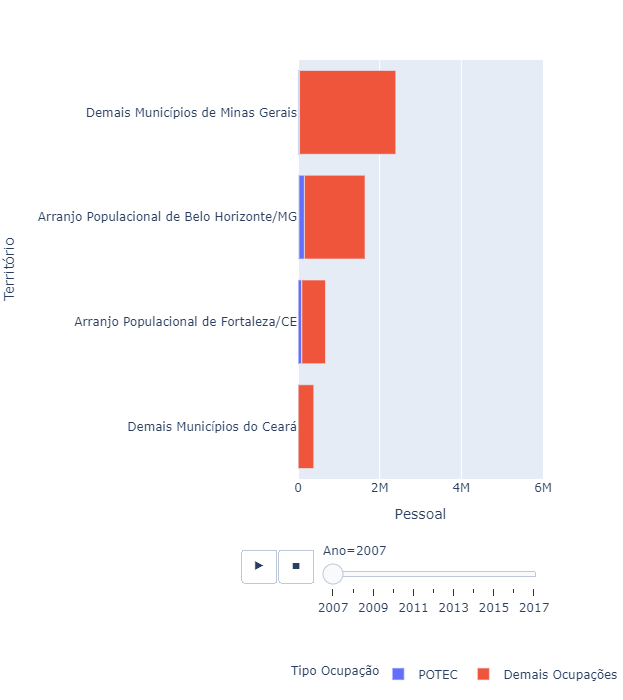

In [10]:
fig = px.bar(
    data_frame=df07_17[df07_17['UF'].isin(['CE', 'MG'])]
    , x='Pessoal'
    , y='Território'
    , animation_frame='Ano'
    , color='Tipo Ocupação'
    , range_x=(0,6_000_000)
    , height=700
    , orientation='h'

)

fig.update_layout(
    legend=dict(
        orientation="h"
        , yanchor="bottom"
        , y=-.5
        , xanchor="left"
        , x=0)
)
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

In [37]:
df07_17 = df07_17.loc[df07_17['UF'] == 'CE'].groupby(['Ano', 'Território', 'potec'], observed=True).sum()

In [38]:
df07_17 = df07_17.reset_index()

In [39]:
df07_17.head()

,Ano,Território,potec,Pessoal
0,2007,Arranjo Populacional de Fortaleza/CE,Diretores e Gerentes de P&D,108
1,2007,Arranjo Populacional de Fortaleza/CE,Engenheiros Mecatrônicos,3
2,2007,Arranjo Populacional de Fortaleza/CE,Engenheiros Civis etc,1989
3,2007,Arranjo Populacional de Fortaleza/CE,"Engenheiros agrônomos, de alimentos, florestai...",250
4,2007,Arranjo Populacional de Fortaleza/CE,Pesquisadores,44


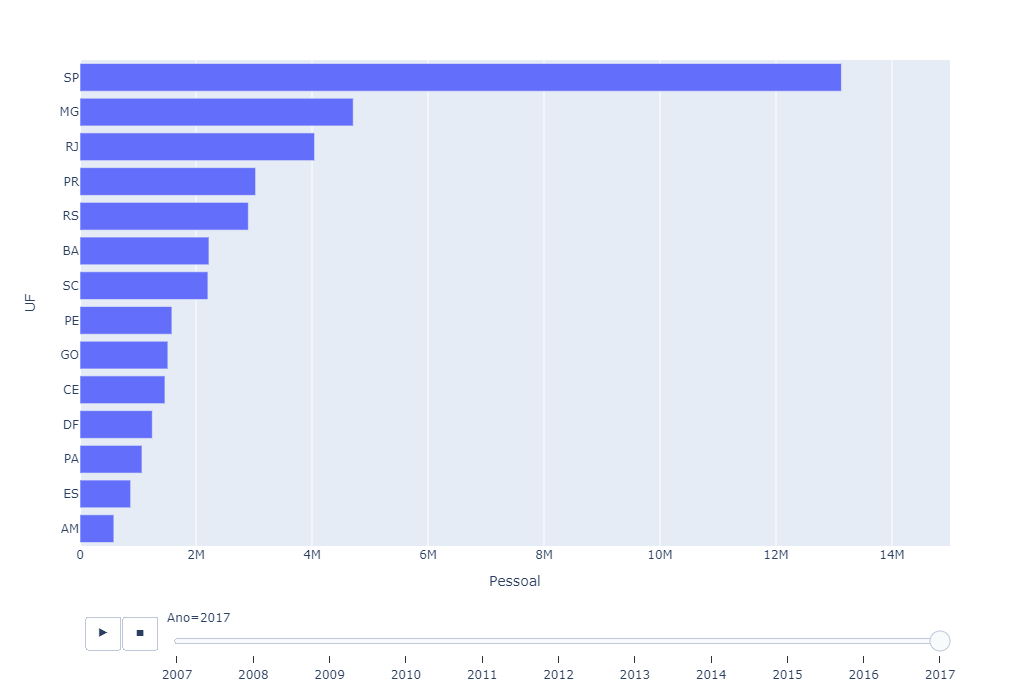

In [58]:
fig = px.bar(
    data_frame=df07_17.groupby(['Ano', 'UF']).sum().reset_index()
    , x='Pessoal'
    , y='UF'
    , animation_frame='Ano'
    , range_x=(0,15_000_000)
    , height=700
    , orientation='h'

)

fig.update_layout(
    legend=dict(
        orientation="h"
        , yanchor="bottom"
        , y=-.5
        , xanchor="left"
        , x=0)
)
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

In [10]:
df_feather_ce_2007 = pd.read_feather('app_rais/data/rais_dataframes/ufs_with_motropolises_2007.ftd')

df_feather_ce_2007[df_feather_ce_2007['UF'] == 'MG']['Pessoal'].sum()

4036203

In [11]:
df_txt_ce2007 = pd.read_table('app_rais/data/rais_original/2007/MG2007.txt', encoding='Latin-1', sep=';')

In [12]:
df_txt_ce2007 = df_txt_ce2007[df_txt_ce2007['Vínculo Ativo 31/12']== 1]

In [13]:
df_txt_ce2007['Vínculo Ativo 31/12'].count()

4036203

In [14]:
df_pickle_2007 = pd.read_pickle('app_rais/data/rais_treated/2007/MG2007.zip')

In [15]:
df_pickle_2007['CBO Ocupação 2002'].count()

4036203

In [40]:
df_pickle_2007[df_pickle_2007['arranjo'] == 'Arranjo Populacional de Fortaleza/CE'].count()

CBO Ocupação 2002          673040
CNAE 2.0 Classe            673040
CNAE 95 Classe             673040
Faixa Etária               673036
Faixa Remun Dezem (SM)     655614
Faixa Remun Média (SM)     668968
Escolaridade após 2005     673040
Idade                      673040
Ind Simples                673040
Município                  673040
Nacionalidade              673040
Natureza Jurídica          673040
Raça Cor                   673040
Vl Remun Dezembro Nom      673040
Vl Remun Dezembro (SM)     673040
Vl Remun Média Nom         673040
Vl Remun Média (SM)        673040
Sexo Trabalhador           673040
Tamanho Estabelecimento    673040
Tipo Estab                 673040
Tipo Estab.1               673040
territorio_tese                 0
arranjo                    673040
knowledge_services         673040
technology_industries      673040
potec                      673040
dtype: int64

In [67]:
df2007 = pd.read_feather('app_rais/data/rais_dataframes/ufs_with_motropolises_2007.ftd')

In [ ]:
df2007.sum()

In [ ]:
df2007[df2007['Território'] == 'Arranjo Populacional de Fortaleza/CE'][df2007['Potec Grupo'] != 'Demais Ocupações'].sort_values(by=['Pessoal'], ascending=False)